In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("data/expenses.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df = pd.get_dummies(data = df,drop_first=True)

In [7]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [8]:
lr = LinearRegression()
X = df[['bmi']]
y = df['charges']
lr.fit(X, y)
print(lr.intercept_, lr.coef_)

1192.9372089611497 [393.8730308]


In [9]:
import statsmodels.api as sn
X = sn.add_constant(X)
model = sn.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           2.46e-13
Time:                        16:15:04   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1192.9372   1664.802      0.717      0.4

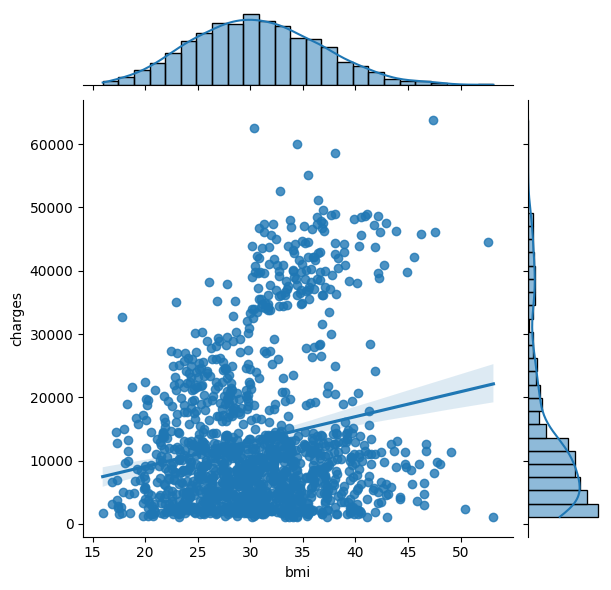

In [10]:
sns.jointplot(x=df['bmi'], y=y, kind='reg')

In [11]:
lr_m = LinearRegression()
X_m = df.drop( 'charges', axis=1)
y_m = df['charges']
lr_m.fit(X_m, y_m)
print(lr_m.intercept_, lr_m.coef_)

-11938.538576167142 [  256.85635254   339.19345361   475.50054515  -131.3143594
 23848.53454191  -352.96389942 -1035.02204939  -960.0509913 ]


In [12]:
import statsmodels.api as sn
X_m = sn.add_constant(X_m)
X_m = X_m.astype('float64')
y_m = y_m.astype('float64')
model_m = sn.OLS(y_m, X_m).fit()
print(model_m.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 02 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:15:05   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819  

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_m, y_m, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(1070, 9)

In [15]:
lr_m = LinearRegression()
lr_m.fit(X_train, y_train)
print(lr_m.intercept_, lr_m.coef_)

-11931.219050326757 [ 0.00000000e+00  2.56975706e+02  3.37092552e+02  4.25278784e+02
 -1.85916916e+01  2.36511289e+04 -3.70677326e+02 -6.57864297e+02
 -8.09799354e+02]


In [16]:
from sklearn.metrics import r2_score
r2_score(y_test,lr_m.predict(X_test))

0.7835929767120723